Creare:
1. Dato un file di log vogliamo il numero di interazioni totale (il numero di righe di quel dataframe)
2. la distribuzione del numero di interazioni per utente (group_by sullo userid, count, plot istogramma)
3. numero di attività incluse nel corso
4. barplot (per ogni attività → x, quante interazioni sono relative a quell'attività (group_by attività→ context))
5. barplot dove, per ogni tipo di evento, quante interazioni sono relative a quell'evento (event)
6. dato uno studente creare un plot che mostra il numero di interazioni (x→ tempo (giorni), y→ numero di interazioni)

# Dato un file di log vogliamo il numero di interazioni totale (il numero di righe di quel dataframe)

In [2]:
import matplotlib.pyplot as plt
import datetime
from datetime import date
from tqdm import tqdm
import pandas as pd
import numpy as np
import glob
import os

path = '/Users/robertagalici/Desktop/EdnetReal/data/Dati_Moodle/Nuovi/'

In [5]:
# calcoliamo il numero di utenti e il numero di interazioni per corso
header = ['timestamp', 'user_id', 'user_involved', 'context', 'component', 'event', 'description', 'origin', 'ip']

course_name = []
no_interactions = []
no_user = []

for fname in os.listdir(path):
    if not fname.endswith(".csv"):
        continue
    df = pd.read_csv(os.path.join(path, fname), sep=',', encoding='utf-8')
    df.columns = header
    df1 = df[df["user_id"].str.contains("Moodle Analitycs")==False]
    df2 = df1[df1["user_id"].str.contains("-")==False]
    
    students_names = df1["user_id"]
    
    course_name.append(fname.split('_')[1])
    no_interactions.append(len(df2.index))
    no_user.append(len(df2['user_id'].unique()))

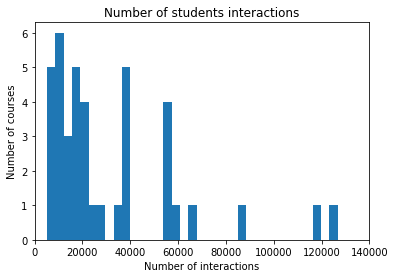

In [6]:
plt.hist(no_interactions, bins=35)
plt.xlim(0, 140000)
plt.title("Number of students interactions")
plt.xlabel("Number of interactions")
plt.ylabel("Number of courses")
plt.show()

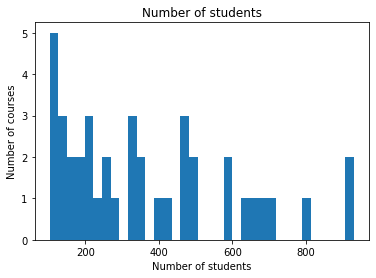

In [7]:
plt.hist(no_user, bins=35)
plt.title("Number of students")
plt.xlabel("Number of students")
plt.ylabel("Number of courses")
plt.show()

# La distribuzione del numero di interazioni per utente (group_by sullo userid, count, plot istogramma)